In [1]:
import math
import torch
from activations import TripleSigmoid

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

print(f'Deivce: {device}')

Deivce: mps


In [3]:
triple_sigmoid = TripleSigmoid()

In [4]:
x = torch.linspace(-1000, 1000, 10000).to(device)
y_ts = triple_sigmoid(x)
y_s = torch.sigmoid(x)

In [5]:
x_np = x.cpu().numpy()
y_ts_np = y_ts.cpu().numpy()
y_s_np = y_s.cpu().numpy()

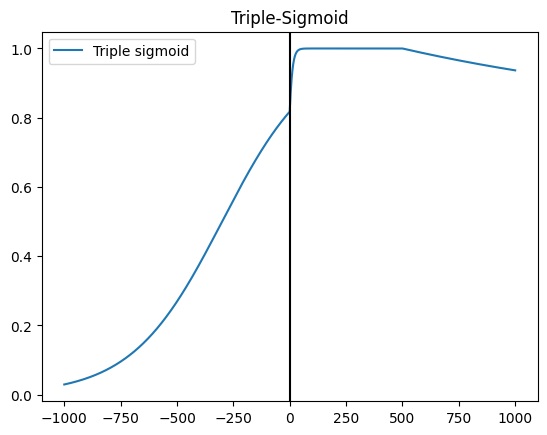

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_np, y_ts_np, label='Triple sigmoid')
plt.axvline(0, color='0')
plt.legend()
plt.title('Triple-Sigmoid')
plt.show()

In [7]:
y_ts_p = (torch.diff(y_ts) / torch.diff(x)).cpu()
y_s_p = (torch.diff(y_s) / torch.diff(x)).cpu()
x_p = ((x[:-1] + x[1:]) / 2).cpu()

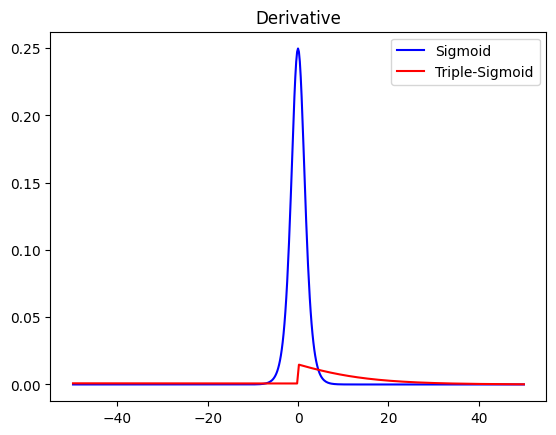

In [8]:
plt.figure(1)
plt.plot(x_p[4750:4750+500], y_s_p[4750:4750+500], 'b', label='Sigmoid')
plt.plot(x_p[4750:4750+500], y_ts_p[4750:4750+500], 'r', label='Triple-Sigmoid')
plt.legend()
plt.title('Derivative')
plt.show()